In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.dates as mdates

In [13]:
os.path.exists("backtest_result")
save_path = 'figure/' 
if not os.path.exists(save_path):
    os.makedirs(save_path)

import matplotlib
a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
plt.rcParams["font.family"] = 'STIXGeneral'

In [32]:
pv = np.load('backtest_result/QFPIS_new_val_record_QPL_1_forex_data.npy')

In [33]:
pv

array([      -inf, 0.44201044, 0.27360069, 0.29442488, 0.3094815 ,
       1.09865105, 1.04211073, 0.31014964, 0.30873589, 0.35287655,
       0.3788249 , 0.30338383, 0.37458901, 1.0978513 , 1.06543602,
       1.17815317, 0.73633155, 0.39387164, 0.43853938, 1.1204895 ,
       1.05551679, 0.9984832 , 1.17496222, 1.13603293, 1.34963435,
       0.59296322, 1.13717647, 0.69454561, 0.89734295, 0.95746466,
       1.17717537, 0.94804566, 1.12560549, 1.19436404, 0.5218802 ,
       1.16014153, 1.21381887, 1.2366337 , 1.15374498, 1.17468977,
       1.34730304, 1.32229197, 1.22735   , 1.0447103 , 1.17810705,
       0.88652503, 1.33021892, 1.32261519, 1.22748621, 1.30718831,
       1.16754505, 1.40065128, 1.08716747, 1.37728433, 1.3240909 ,
       1.55339787, 1.55885723, 1.16141619, 1.52180508, 1.61748559,
       1.59646313, 1.60872207, 1.57696775, 1.65826237, 1.65944467,
       1.65484666, 1.69109281, 1.70467867, 1.66993495, 1.68400799,
       1.68335597, 1.69901836, 1.70157725, 1.70526785, 1.70437

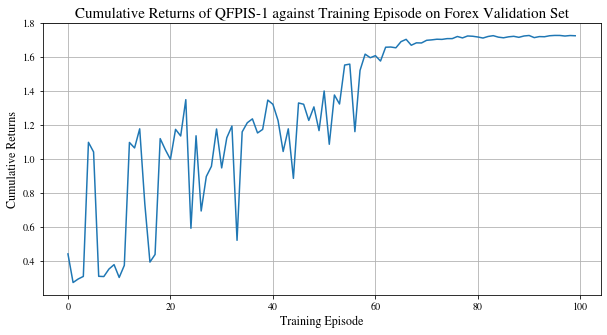

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(pv[1:])
plt.title('Cumulative Returns of QFPIS-1 against Training Episode on Forex Validation Set', fontsize=15)
plt.xlabel('Training Episode', fontsize=12)
plt.ylabel('Cumulative Returns', fontsize=12)
plt.grid()

figure_name = "cumulative_return_against_episode.png"
plt.savefig(os.path.join(save_path, figure_name),dpi=400,bbox_inches = 'tight')
plt.show()


In [6]:
def z_score_normalize(arr):
    """
    使用z-score normalization对一维numpy数组进行归一化。
    
    Parameters
    ----------
    arr : numpy.ndarray
        要进行归一化的一维numpy数组。
    
    Returns
    -------
    numpy.ndarray
        归一化后的一维numpy数组。
    """
    # 计算平均值和标准差
    mean = np.mean(arr)
    std = np.std(arr)
    
    # 使用z-score normalization归一化数据
    arr_normalized = (arr - mean) / std
    
    return arr_normalized

def min_max_normalize(arr, new_min=1, new_max=2):
    """
    使用min-max normalization对一维numpy数组进行归一化。
    
    Parameters
    ----------
    arr : numpy.ndarray
        要进行归一化的一维numpy数组。
    new_min : float, optional
        归一化后的最小值。默认为0。
    new_max : float, optional
        归一化后的最大值。默认为1。
    
    Returns
    -------
    numpy.ndarray
        归一化后的一维numpy数组。
    """
    # 找到最小值和最大值
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    
    # 使用min-max normalization归一化数据
    arr_normalized = (arr - arr_min) / (arr_max - arr_min) * (new_max - new_min) + new_min
    
    return arr_normalized

In [7]:
model_list = ['A2C', 'PPO', 'SAC','DDPG','CWMR','OLMAR','RMR','QFPIS']
QPL = ['QPL_1','QPL_2','QPL_3','QPL_4','QPL_5','QPL_6','QPL_7','QPL_8']
market_list = ['forex_data','China_stock','US_stock']

In [8]:
FPVs = []
SRs = []
for i in range(len(QPL)):
    res_df = pd.read_csv(f'backtest_result/{model_list[-1]}_{QPL[i]}_{market_list[0]}_results.csv')
    FPV = res_df.loc[res_df['metric'] == 'FPV', 'value'].values
    SR = res_df.loc[res_df['metric'] == 'SR', 'value'].values
    FPVs.append(float(FPV[0]))
    SRs.append(float(SR[0]))
FPVs = np.array(FPVs)
SRs = np.array(SRs)
FPVs = min_max_normalize(FPVs)
SRs = min_max_normalize(SRs)

In [9]:
index = np.arange(1,len(QPL)+1,1)
index

array([1, 2, 3, 4, 5, 6, 7, 8])

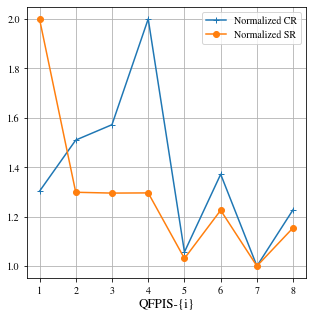

In [10]:

plt.figure(figsize=(5, 5))

plt.plot(index,FPVs, marker='+', label="Normalized CR")
plt.plot(index,SRs, marker='o', label="Normalized SR")

plt.xlabel("QFPIS-{i}",fontsize=13)

plt.grid()
plt.legend()


figure_name = "cr_sr_against_QPL.png"
plt.savefig(os.path.join(save_path, figure_name),dpi=400,bbox_inches = 'tight')
plt.show()

In [11]:
SRs

array([2.        , 1.2985608 , 1.29524785, 1.29598941, 1.03072718,
       1.22570676, 1.        , 1.15494703])

In [37]:
FPVs = [16.8580192440481,14.9891613936813,14.2375280518291,14.1546467572382]

In [38]:
FPVs = min_max_normalize(FPVs)

In [39]:
FPVs

array([2.        , 1.30869391, 1.03065848, 1.        ])